# Create predefined 4-letter strings for a higher similarity rate

In [1]:
from random import choice, randint
from string import ascii_letters


words = ["".join(choice(ascii_letters) for _ in range(4)) for _ in range(10)]
words

['rJJO',
 'lqLi',
 'ljli',
 'kutv',
 'TGyl',
 'ZOkD',
 'yXTS',
 'iycn',
 'Rxqi',
 'EoGB']

# Create a dataset with strings of variable length between 32 and 64 along its shingles

In [3]:
dataset = []

for i in range(10000):
    r = [i]
    s = ""
    length = randint(32, 64)

    while len(s) < length:
        s += choice(words)
    
    r.append(s)
    # Generate a shinglet for the string
    r.append([r[1][j : j + 4] for j in range(len(r[1]) - 3)])
    dataset.append(r)

dataset[0]

[0,
 'ZOkDZOkDrJJOEoGBkutvrJJOkutvlqLiTGylZOkDRxqiRxqiyXTS',
 ['ZOkD',
  'OkDZ',
  'kDZO',
  'DZOk',
  'ZOkD',
  'OkDr',
  'kDrJ',
  'DrJJ',
  'rJJO',
  'JJOE',
  'JOEo',
  'OEoG',
  'EoGB',
  'oGBk',
  'GBku',
  'Bkut',
  'kutv',
  'utvr',
  'tvrJ',
  'vrJJ',
  'rJJO',
  'JJOk',
  'JOku',
  'Okut',
  'kutv',
  'utvl',
  'tvlq',
  'vlqL',
  'lqLi',
  'qLiT',
  'LiTG',
  'iTGy',
  'TGyl',
  'GylZ',
  'ylZO',
  'lZOk',
  'ZOkD',
  'OkDR',
  'kDRx',
  'DRxq',
  'Rxqi',
  'xqiR',
  'qiRx',
  'iRxq',
  'Rxqi',
  'xqiy',
  'qiyX',
  'iyXT',
  'yXTS']]

# Save the dataset to `csv`

In [4]:
import csv


with open("dataset.csv", "w") as f:
    w = csv.writer(f)
    w.writerow(["index", "string", "shingles"])
    w.writerows(dataset)

!head dataset.csv

index,string,shingles
0,ZOkDZOkDrJJOEoGBkutvrJJOkutvlqLiTGylZOkDRxqiRxqiyXTS,"['ZOkD', 'OkDZ', 'kDZO', 'DZOk', 'ZOkD', 'OkDr', 'kDrJ', 'DrJJ', 'rJJO', 'JJOE', 'JOEo', 'OEoG', 'EoGB', 'oGBk', 'GBku', 'Bkut', 'kutv', 'utvr', 'tvrJ', 'vrJJ', 'rJJO', 'JJOk', 'JOku', 'Okut', 'kutv', 'utvl', 'tvlq', 'vlqL', 'lqLi', 'qLiT', 'LiTG', 'iTGy', 'TGyl', 'GylZ', 'ylZO', 'lZOk', 'ZOkD', 'OkDR', 'kDRx', 'DRxq', 'Rxqi', 'xqiR', 'qiRx', 'iRxq', 'Rxqi', 'xqiy', 'qiyX', 'iyXT', 'yXTS']"
1,iycnEoGBiycnTGylrJJOZOkDZOkDTGylyXTSiycnlqLilqLiRxqiTGylEoGBEoGB,"['iycn', 'ycnE', 'cnEo', 'nEoG', 'EoGB', 'oGBi', 'GBiy', 'Biyc', 'iycn', 'ycnT', 'cnTG', 'nTGy', 'TGyl', 'Gylr', 'ylrJ', 'lrJJ', 'rJJO', 'JJOZ', 'JOZO', 'OZOk', 'ZOkD', 'OkDZ', 'kDZO', 'DZOk', 'ZOkD', 'OkDT', 'kDTG', 'DTGy', 'TGyl', 'Gyly', 'ylyX', 'lyXT', 'yXTS', 'XTSi', 'TSiy', 'Siyc', 'iycn', 'ycnl', 'cnlq', 'nlqL', 'lqLi', 'qLil', 'Lilq', 'ilqL', 'lqLi', 'qLiR', 'LiRx', 'iRxq', 'Rxqi', 'xqiT', 'qiTG', 'iTGy', 'TGyl', 'GylE', 'ylEo', 'lEoG', 'EoGB', 'oG

# Load the dataset into `pandas`

In [5]:
from ast import literal_eval
import pandas as pd


df = pd.read_csv("dataset.csv", index_col="index")
df["shingles"] = df["shingles"].apply(literal_eval)

df

,string,shingles
index,,
0,ZOkDZOkDrJJOEoGBkutvrJJOkutvlqLiTGylZOkDRxqiRx...,"[ZOkD, OkDZ, kDZO, DZOk, ZOkD, OkDr, kDrJ, DrJ..."
1,iycnEoGBiycnTGylrJJOZOkDZOkDTGylyXTSiycnlqLilq...,"[iycn, ycnE, cnEo, nEoG, EoGB, oGBi, GBiy, Biy..."
2,rJJOiycnlqLiEoGBkutvlqLilqLilqLikutvRxqi,"[rJJO, JJOi, JOiy, Oiyc, iycn, ycnl, cnlq, nlq..."
3,EoGBTGylkutviycnZOkDRxqiljliljlirJJO,"[EoGB, oGBT, GBTG, BTGy, TGyl, Gylk, ylku, lku..."
4,iycnljliljliyXTSkutvrJJOTGylrJJOlqLiTGylljliTG...,"[iycn, ycnl, cnlj, nljl, ljli, jlil, lilj, ilj..."
...,...,...
9995,yXTSkutvTGylljliyXTSljliiycnRxqiRxqiiycnljliku...,"[yXTS, XTSk, TSku, Skut, kutv, utvT, tvTG, vTG..."
9996,ZOkDyXTSljliEoGBlqLikutvTGylkutviycnlqLiRxqiyX...,"[ZOkD, OkDy, kDyX, DyXT, yXTS, XTSl, TSlj, Slj..."
9997,TGylZOkDZOkDrJJOlqLiiycnEoGBiycnRxqirJJOZOkDyX...,"[TGyl, GylZ, ylZO, lZOk, ZOkD, OkDZ, kDZO, DZO..."


# Binarize the shingles into a sparse matrix

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer


features = MultiLabelBinarizer().fit_transform(df["shingles"].apply(lambda x: map(str.casefold, x)))
features.shape

(10000, 260)

# Create a class for non-Euclidian space agglomerative clustering, measured with Jaccard distance

In [7]:
from collections import deque
import numpy as np


class AgglomerativeClustering:
    def __init__(self, n_clusters=3, jump_threshold=None, seed=42):
        self.n_clusters = n_clusters
        self.jump_threshold = jump_threshold
        self.seed = seed

    def fit(self, X):
        clusters = pd.DataFrame(
            [(i, [i]) for i in range(len(X))],
            columns=["clustroid", "points"],
        )

        # Create a stack for the nearest-neighbor chain algorithm
        stack = deque([])
        rng = np.random.default_rng(self.seed)
        last_diameter = 0

        while len(clusters) > self.n_clusters + 1:
            # if the stack is empty, push a random clustroid into the stack
            if len(stack) == 0:
                stack.appendleft(
                    clusters["clustroid"].sample(1, random_state=rng).item()
                )

            # get the clustroid and all other clustroids
            cid = stack[0]
            clustroids = clusters.loc[
                clusters["clustroid"] != cid, "clustroid"
            ].values

            # calculate and compare the Jaccard distances between the clustroids
            # to get the closest clusters to the clustroids  
            dist = X[clustroids, :]
            s = dist.dot(X[cid])
            u = X.shape[1] - (1 - dist).dot(1 - X[cid])
            jd = 1 - s / u
            d = clustroids[jd.argmin()]

            if d in stack:
                # if d is in the stack, then d is the immediate predecessor
                # to the original cluster of the clstroid above, thus pop
                # and remove both clustroids from the stack
                stack.popleft()
                stack.remove(d)

                # merge the clusters of the two clustroids
                points = np.array(
                    clusters.loc[clusters["clustroid"] == d, "points"].item()
                    + clusters.loc[
                        clusters["clustroid"] == cid, "points"
                    ].item()
                )

                # get the point with the lowest sum of square distance
                # to all other points to get the new clustroid of the
                # merged clusters
                dist = X[points, :]
                odist = dist.T

                s = dist.dot(odist)
                u = X.shape[1] - (1 - dist).dot(1 - odist)
                jd = 1 - s / u

                if self.jump_threshold is not None:
                    diameter = jd.max()

                    if np.abs(last_diameter - diameter) > self.jump_threshold:
                        print(f"Merging clusters with clustroid {cid} and {d} yeilded a bad cluster with a jump of {np.abs(last_diameter - diameter)}.")
                        break

                    last_diameter = diameter

                clustroid = points[np.square(jd).sum(axis=1).argmin()]

                clusters.loc[clusters["clustroid"] == cid, "clustroid"] = (
                    clustroid
                )
                clusters.loc[clusters["clustroid"] == d, "clustroid"] = (
                    clustroid
                )
                clusters = clusters.groupby(["clustroid"], as_index=False).agg(
                    {"points": "sum"}
                )

                print(f"{len(clusters) - (self.n_clusters + 1)} clusters remaining", end="\r")
            else:
                stack.appendleft(d)

        self.labels = (
            clusters.explode("points").sort_values("points")["clustroid"].values
        )

        return self

    def fit_predict(self, X):
        self.fit(X)
        return self.labels

# Fit the algorithm, generate 10 clusters and get clustroids associated with each points

In [8]:
ac = AgglomerativeClustering(n_clusters=10, jump_threshold=0.8, seed=42)
labels = ac.fit_predict(features)

labels

array([1343, 2415, 1343, ..., 1343, 1343, 1343])

# Strings associated with the clustroids

In [16]:
clustroids = np.sort(np.unique(labels))
strings = df.iloc[clustroids]["string"]

strings

index
1343    TGyllqLirJJOkutvRxqiRxqiyXTSlqLiZOkDEoGByXTSlq...
1466    RxqiZOkDZOkDrJJOEoGBEoGBTGylRxqiEoGBiycniycniy...
2415    rJJOTGylEoGBkutvyXTSEoGBRxqiZOkDkutvyXTSRxqiku...
2776         EoGBljliyXTSkutviycnRxqirJJOyXTSZOkDRxqirJJO
3468                 iycnZOkDTGyllqLiZOkDkutvZOkDEoGBkutv
3752                 yXTSEoGBTGyliycnlqLiyXTSrJJOljliZOkD
3795    RxqiyXTSlqLiyXTSRxqirJJOlqLiEoGBZOkDlqLiZOkDiy...
6157             EoGBiycnkutvEoGBiycnEoGBrJJOljliiycnZOkD
7020                 yXTSiycnZOkDljliRxqiTGylTGylyXTSZOkD
8926             TGylkutvRxqiEoGBkutvkutvrJJOrJJORxqiljli
9089             rJJOEoGBEoGBiycnrJJOZOkDlqLiZOkDiycnrJJO
Name: string, dtype: object

# Get average distances from each points within a cluster to its clustroids

In [17]:
ajd = []

for c in clustroids:
    ft = features[np.argwhere(labels == c)]
    cf = features[c]
    s = ft.dot(cf)
    u = features.shape[1] - (1 - ft).dot(1 - cf)
    jds = 1 - s / u

    ajd.append(jds.mean())

ajd

[0.8090391161744237,
 0.7757475458201734,
 0.8084148535857185,
 0.799656575662779,
 0.7804267864305218,
 0.6563577545377721,
 0.6941309272162229,
 0.6863621555255427,
 0.6829868045556217,
 0.6781327238907647,
 0.6274936876775825]

# Graph the average distances as a bar plot

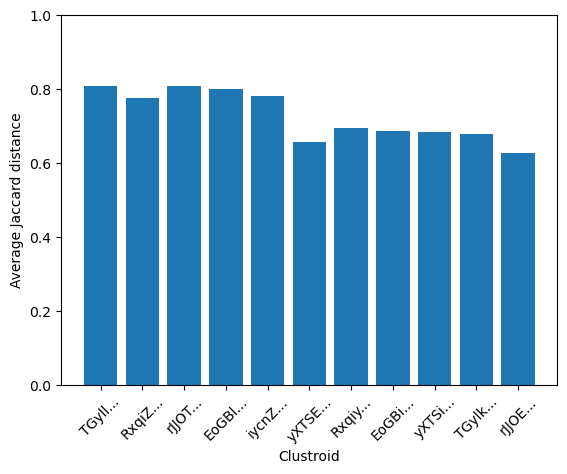

In [18]:
import matplotlib.pyplot as plt

plt.bar(range(11), ajd)
plt.xticks(range(11), strings.apply(lambda x: x[:5] + "..."), rotation=45)
plt.xlabel("Clustroid")
plt.ylabel("Average Jaccard distance")
plt.ylim(top=1)
plt.show()